# Desafio de Inferência sobre depressão

## Objetivos:

### 1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

### 2) Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

In [1]:
# Importar as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Removendo warnings
import warnings
warnings.filterwarnings('ignore')
# Aumentando a quantidade de linhas e colunas que podem ser vistas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 
# Carregando os dados
phq = pd.read_csv('DEMO_PHQ.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0)
pag_hei = pd.read_csv('PAG_HEI.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0)

# Pré-tratamento do dataset DEMO_PHQ

In [2]:
# Visão geral do banco de dados DEMO_PHQ
phq

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0


In [3]:
# Análise descritiva do banco de dados DEMO_PQH
# Olhando as 10 primeiras linhas da base de dados Patient Health Questionnaire
phq.head(10)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0
31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0


In [4]:
# Entendendo a tipagem dos dados e reconhecendo valores nulos
phq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DPQ010    4836 non-null   float64
 1   DPQ020    4836 non-null   float64
 2   DPQ030    4836 non-null   float64
 3   DPQ040    4836 non-null   float64
 4   DPQ050    4836 non-null   float64
 5   DPQ060    4836 non-null   float64
 6   DPQ070    4836 non-null   float64
 7   DPQ080    4836 non-null   float64
 8   DPQ090    4836 non-null   float64
 9   RIAGENDR  5334 non-null   int64  
 10  RIDAGEYR  5334 non-null   int64  
 11  RIDRETH1  5334 non-null   int64  
 12  DMDEDUC   5334 non-null   int64  
 13  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 625.1 KB


In [5]:
# Observar sumário estatístico dos valores de cada coluna
phq.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


In [6]:
# Criou-se uma cópia do dataset original para retirar as linhas com valor 7, 9, 77 e 99 (esses dois últimos para renda)
phq_a1 = phq.copy()

In [7]:
# Uso do loop for para excluir as linhas com valores iguais a 7 ou 9
drop_col = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for column in drop_col:
    phq_a1 = phq_a1.loc[phq_a1[column] != 7]
    phq_a1 = phq_a1.loc[phq_a1[column] != 9]

In [8]:
# Usando a mesma estrutura para excluir as respostas 77 e 99 para renda
drop_colum2 = ['INDFMINC']
for column in drop_colum2:
    phq_a1 = phq_a1.loc[phq_a1[column] != 77]
    phq_a1 = phq_a1.loc[phq_a1[column] != 99]

In [9]:
# Repetição da operação acima para retirar valores 7 e 9 da variável escolaridade
drop_colum3 = ['DMDEDUC']
for column in drop_colum3:
    phq_a1 = phq_a1.loc[phq_a1[column] != 7]
    phq_a1 = phq_a1.loc[phq_a1[column] != 9]

In [10]:
# Verificando as linhas que restaram após a limpeza
phq_a1.shape

(5183, 14)

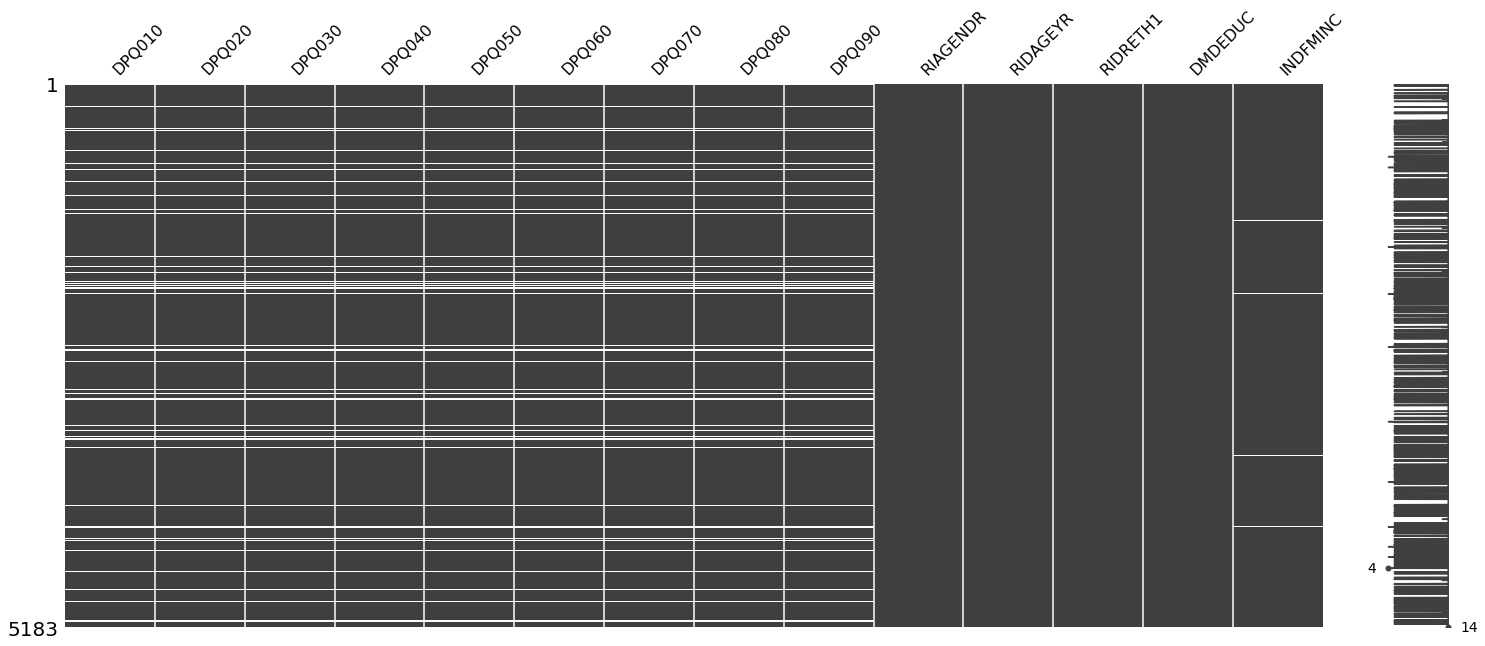

In [11]:
# Analisar o posicionamento de cada missing nas variáveis com o missingno ((!pip install missingno))
import missingno as msno
msno.matrix(phq_a1)
plt.show()

In [12]:
# Calculando a média de missings de cada coluna em relação a ela mesma, observa-se que cerca de 9,08% não possui dado.
phq_a1.isna().mean(axis=0)*100

DPQ010      9.010226
DPQ020      9.010226
DPQ030      9.010226
DPQ040      9.010226
DPQ050      9.010226
DPQ060      9.010226
DPQ070      9.010226
DPQ080      9.010226
DPQ090      9.010226
RIAGENDR    0.000000
RIDAGEYR    0.000000
RIDRETH1    0.000000
DMDEDUC     0.000000
INDFMINC    0.906811
dtype: float64

In [13]:
# Decidi excluir os dados faltantes, pois representam baixa proporção em relação à base
phq_a1.dropna(axis=0, how='any', inplace=True)

In [14]:
# Visão geral do dataset final
phq_a1

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
SEQN,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0


# Pré-tratamento do dataset PAG_HEI

In [15]:
pag_hei

,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467


In [16]:
# Análise descritiva do banco de dados PAG_HEI
# Visualizar as 5 primeiras linhas do banco
pag_hei.head()


,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,
31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [17]:
# Tipagem dos dados e valores nulos
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 31128 to 41474
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PAG_MINW                  7150 non-null   float64
 1   ADHERENCE                 7150 non-null   float64
 2   HEI2015C1_TOTALVEG        8549 non-null   float64
 3   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 4   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 5   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 6   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 7   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 8   HEI2015C7_TOTPROT         8549 non-null   float64
 9   HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 10  HEI2015C9_FATTYACID       8549 non-null   float64
 11  HEI2015C10_SODIUM         8549 non-null   float64
 12  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 13  HEI2015C12_SFAT           8549 non-null   float64
 14  HEI

In [18]:
# Identificando a média percentual dos missings
pag_hei.isna().mean(axis=0)*100

PAG_MINW                    24.129881
ADHERENCE                   24.129881
HEI2015C1_TOTALVEG           9.284805
HEI2015C2_GREEN_AND_BEAN     9.284805
HEI2015C3_TOTALFRUIT         9.284805
HEI2015C4_WHOLEFRUIT         9.284805
HEI2015C5_WHOLEGRAIN         9.284805
HEI2015C6_TOTALDAIRY         9.284805
HEI2015C7_TOTPROT            9.284805
HEI2015C8_SEAPLANT_PROT      9.284805
HEI2015C9_FATTYACID          9.284805
HEI2015C10_SODIUM            9.284805
HEI2015C11_REFINEDGRAIN      9.284805
HEI2015C12_SFAT              9.284805
HEI2015C13_ADDSUG            9.284805
HEI2015_TOTAL_SCORE          9.284805
dtype: float64

In [19]:
# Observando os valores faltantes em termos absolutos
pag_hei.isnull().sum()

PAG_MINW                    2274
ADHERENCE                   2274
HEI2015C1_TOTALVEG           875
HEI2015C2_GREEN_AND_BEAN     875
HEI2015C3_TOTALFRUIT         875
HEI2015C4_WHOLEFRUIT         875
HEI2015C5_WHOLEGRAIN         875
HEI2015C6_TOTALDAIRY         875
HEI2015C7_TOTPROT            875
HEI2015C8_SEAPLANT_PROT      875
HEI2015C9_FATTYACID          875
HEI2015C10_SODIUM            875
HEI2015C11_REFINEDGRAIN      875
HEI2015C12_SFAT              875
HEI2015C13_ADDSUG            875
HEI2015_TOTAL_SCORE          875
dtype: int64

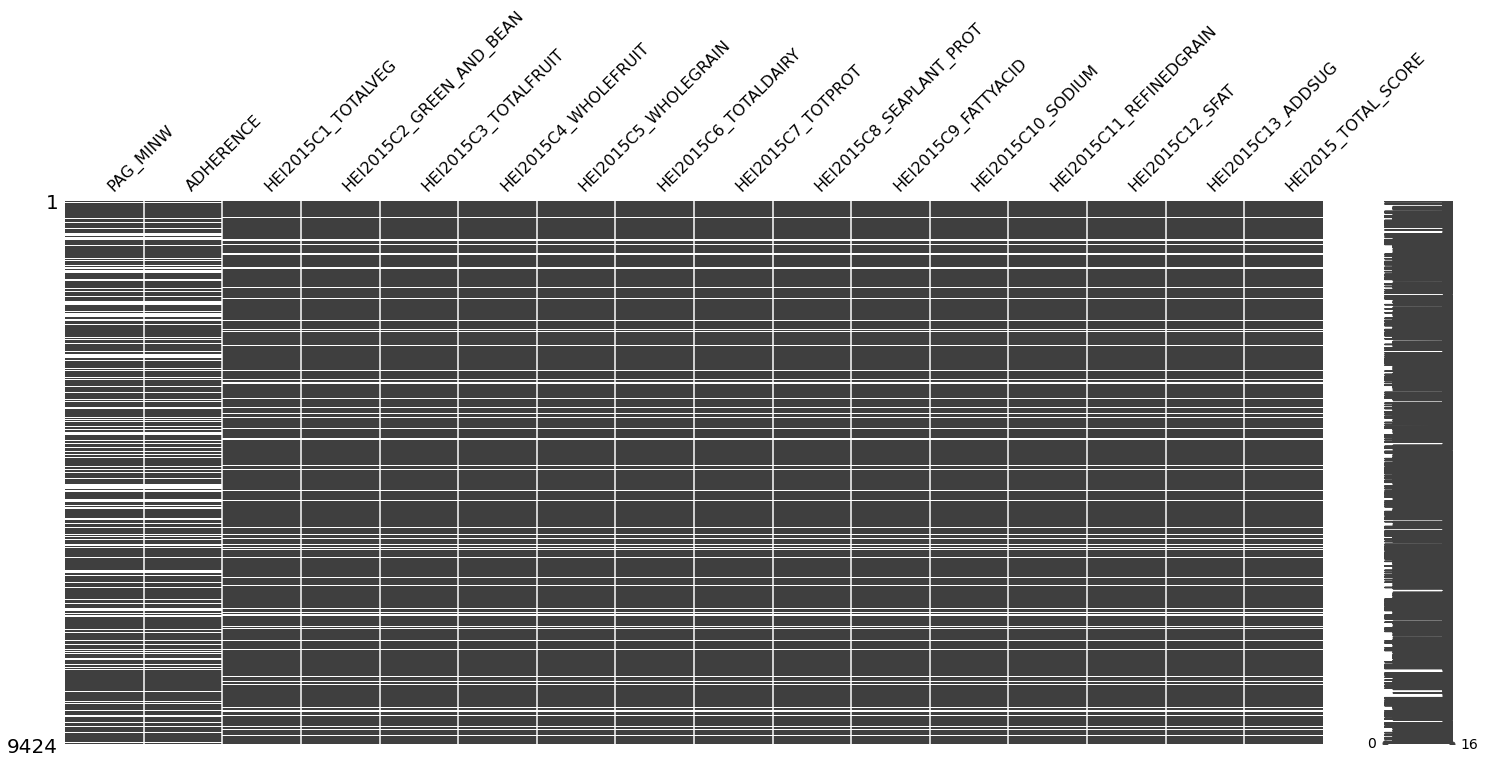

In [20]:
# Identificando as diferentes posições dos missings em cada variável quantitativa
msno.matrix(pag_hei)
plt.show()

### Decidi fazer a limpeza dos dados faltantes após unir os bancos de dados devido ao fato do PAG_HEI conter variáveis quantitativas 

# Concatenar os dois bancos de dados, usando como chave única a variável
# SEQN


In [21]:
# Concatenando os bancos usando merge
SEQN = pd.merge(phq_a1, pag_hei,how='inner', on='SEQN' )
SEQN

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


In [22]:
# Criação da variável PHQ9 como sendo um escore dos valores DPQ010 a DPQ090
SEQN['PHQ9'] = SEQN['DPQ010'] + SEQN['DPQ020'] + SEQN['DPQ030'] + SEQN['DPQ040'] + SEQN['DPQ050'] + SEQN['DPQ060']+ SEQN['DPQ070'] + SEQN['DPQ080'] + SEQN['DPQ090']
SEQN['PHQ9']

SEQN
31131     0.0
31132     0.0
31134     0.0
31139     4.0
31143     6.0
         ... 
41466     2.0
41468    10.0
41469     2.0
41472     0.0
41473     4.0
Name: PHQ9, Length: 4680, dtype: float64

# Seguindo o script proposto pela Tera, criou-se uma nova variável PQH_GR que vai assumir valores condicionais, 
## baseando-se na variável PHQ9 anteriormente criada. A nova variável irá assumir: 
## 0 (“sem sintomas”) se phq9 < 5,
## 1 (“sintomas leves”) se 5 <= phq9 < 10, 
## 2 (“sintomas moderados”) se 10 <= phq9 < 15, 
## 3 (“sintomas moderadamente severos”) se 15 <= phq9 < 19 e 
## 4 (“sintomas severos”) se phq9 >= 20
## Para tanto, foi usado o método np.select

In [23]:
# Criação da lista de condições dos valores com o nome condict
condict = [
    (SEQN['PHQ9'] < 5),
    (SEQN['PHQ9'] >= 5) & (SEQN['PHQ9'] < 10),
    (SEQN['PHQ9'] >= 10) & (SEQN['PHQ9'] < 15),
    (SEQN['PHQ9'] >= 15) & (SEQN['PHQ9'] < 20),
    (SEQN['PHQ9'] >= 20)
]
# Criação de uma nova lista com os respectivos valores de cada grupo:
valores = [0,1,2,3,4]
# Criando a nova coluna com o np.select
SEQN['PHQ_GRP'] = np.select(condict, valores)
SEQN['PHQ_GRP']

SEQN
31131    0
31132    0
31134    0
31139    0
31143    1
        ..
41466    0
41468    2
41469    0
41472    0
41473    0
Name: PHQ_GRP, Length: 4680, dtype: int32

In [24]:
# Verificando se as colunas foram adicionadas
for column in SEQN:
    print(column)

DPQ010
DPQ020
DPQ030
DPQ040
DPQ050
DPQ060
DPQ070
DPQ080
DPQ090
RIAGENDR
RIDAGEYR
RIDRETH1
DMDEDUC
INDFMINC
PAG_MINW
ADHERENCE
HEI2015C1_TOTALVEG
HEI2015C2_GREEN_AND_BEAN
HEI2015C3_TOTALFRUIT
HEI2015C4_WHOLEFRUIT
HEI2015C5_WHOLEGRAIN
HEI2015C6_TOTALDAIRY
HEI2015C7_TOTPROT
HEI2015C8_SEAPLANT_PROT
HEI2015C9_FATTYACID
HEI2015C10_SODIUM
HEI2015C11_REFINEDGRAIN
HEI2015C12_SFAT
HEI2015C13_ADDSUG
HEI2015_TOTAL_SCORE
PHQ9
PHQ_GRP


# Análise Univariada

In [25]:
# Analisando a tipagem dos dados e dados faltantes
SEQN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 31131 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DPQ010                    4680 non-null   float64
 1   DPQ020                    4680 non-null   float64
 2   DPQ030                    4680 non-null   float64
 3   DPQ040                    4680 non-null   float64
 4   DPQ050                    4680 non-null   float64
 5   DPQ060                    4680 non-null   float64
 6   DPQ070                    4680 non-null   float64
 7   DPQ080                    4680 non-null   float64
 8   DPQ090                    4680 non-null   float64
 9   RIAGENDR                  4680 non-null   int64  
 10  RIDAGEYR                  4680 non-null   int64  
 11  RIDRETH1                  4680 non-null   int64  
 12  DMDEDUC                   4680 non-null   int64  
 13  INDFMINC                  4680 non-null   float64
 14  PAG

In [26]:
# Para discernir os missings, foi usada a média dos faltantes por coluna. Assim, é possível concluir que esses dados
# representam cerca de 1.88% da base 
SEQN.isna().mean(axis=0)*100 # Multiplicar por 100 transforma em percentual

DPQ010                      0.000000
DPQ020                      0.000000
DPQ030                      0.000000
DPQ040                      0.000000
DPQ050                      0.000000
DPQ060                      0.000000
DPQ070                      0.000000
DPQ080                      0.000000
DPQ090                      0.000000
RIAGENDR                    0.000000
RIDAGEYR                    0.000000
RIDRETH1                    0.000000
DMDEDUC                     0.000000
INDFMINC                    0.000000
PAG_MINW                    0.000000
ADHERENCE                   0.000000
HEI2015C1_TOTALVEG          1.880342
HEI2015C2_GREEN_AND_BEAN    1.880342
HEI2015C3_TOTALFRUIT        1.880342
HEI2015C4_WHOLEFRUIT        1.880342
HEI2015C5_WHOLEGRAIN        1.880342
HEI2015C6_TOTALDAIRY        1.880342
HEI2015C7_TOTPROT           1.880342
HEI2015C8_SEAPLANT_PROT     1.880342
HEI2015C9_FATTYACID         1.880342
HEI2015C10_SODIUM           1.880342
HEI2015C11_REFINEDGRAIN     1.880342
H

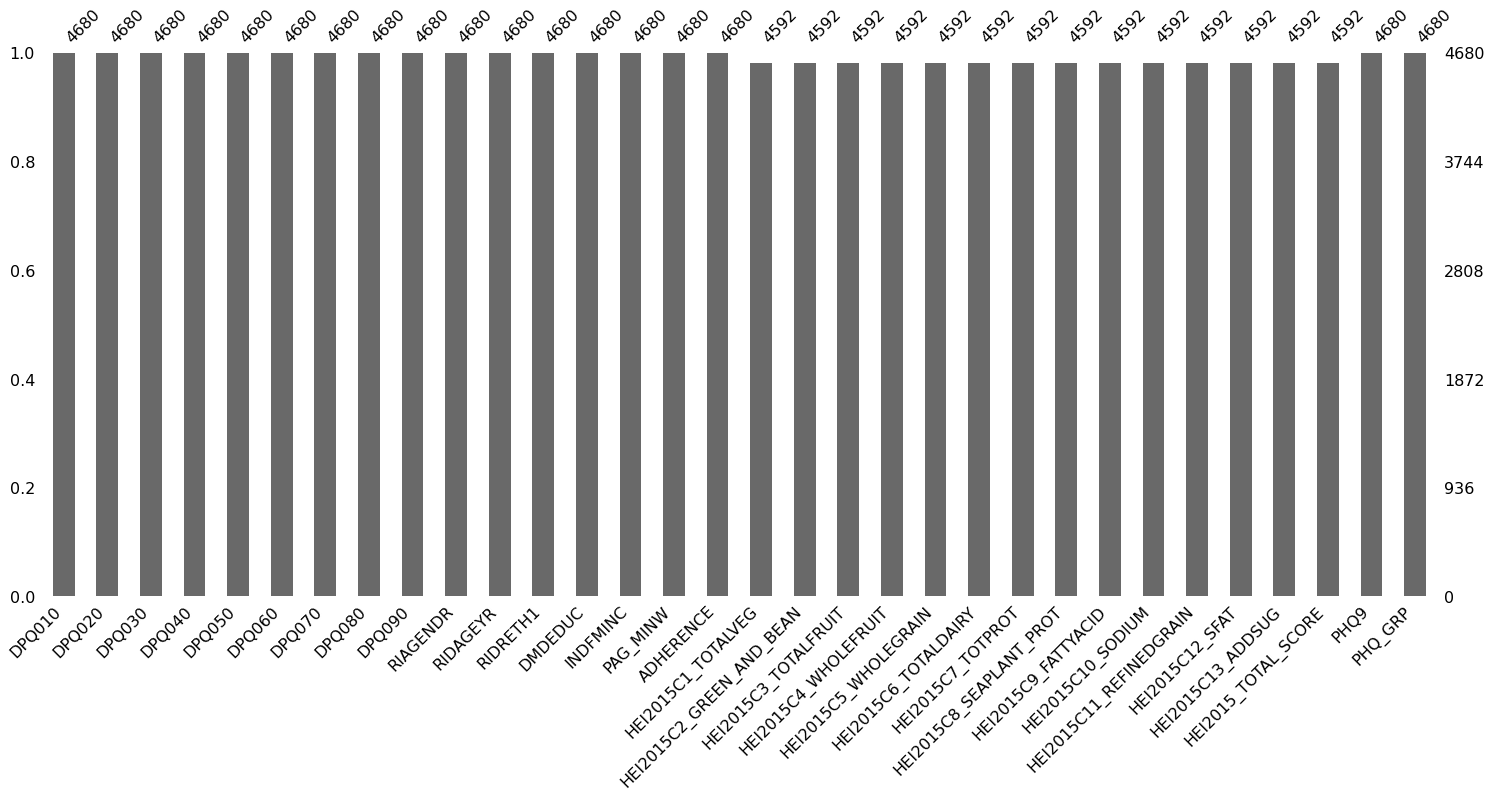

In [27]:
# Para a tomada de decisão, além da análise da média dos dados faltantes, foi usada a visualização do quão preenchido cada
# coluna estava, usando o missingno.
msno.bar((SEQN))
plt.show()

In [28]:
# Outro método simples para ver em termos absolutos os missings é o 'isna'
SEQN.isna().sum()

DPQ010                       0
DPQ020                       0
DPQ030                       0
DPQ040                       0
DPQ050                       0
DPQ060                       0
DPQ070                       0
DPQ080                       0
DPQ090                       0
RIAGENDR                     0
RIDAGEYR                     0
RIDRETH1                     0
DMDEDUC                      0
INDFMINC                     0
PAG_MINW                     0
ADHERENCE                    0
HEI2015C1_TOTALVEG          88
HEI2015C2_GREEN_AND_BEAN    88
HEI2015C3_TOTALFRUIT        88
HEI2015C4_WHOLEFRUIT        88
HEI2015C5_WHOLEGRAIN        88
HEI2015C6_TOTALDAIRY        88
HEI2015C7_TOTPROT           88
HEI2015C8_SEAPLANT_PROT     88
HEI2015C9_FATTYACID         88
HEI2015C10_SODIUM           88
HEI2015C11_REFINEDGRAIN     88
HEI2015C12_SFAT             88
HEI2015C13_ADDSUG           88
HEI2015_TOTAL_SCORE         88
PHQ9                         0
PHQ_GRP                      0
dtype: i

In [29]:
# Assim, optou-se por excluir tais registros, pois representam baixa proporção da base.
# Excluir esses itens
SEQN_A1 = SEQN.dropna(axis = 0, how = "any")
SEQN_A1.isnull().sum()

DPQ010                      0
DPQ020                      0
DPQ030                      0
DPQ040                      0
DPQ050                      0
DPQ060                      0
DPQ070                      0
DPQ080                      0
DPQ090                      0
RIAGENDR                    0
RIDAGEYR                    0
RIDRETH1                    0
DMDEDUC                     0
INDFMINC                    0
PAG_MINW                    0
ADHERENCE                   0
HEI2015C1_TOTALVEG          0
HEI2015C2_GREEN_AND_BEAN    0
HEI2015C3_TOTALFRUIT        0
HEI2015C4_WHOLEFRUIT        0
HEI2015C5_WHOLEGRAIN        0
HEI2015C6_TOTALDAIRY        0
HEI2015C7_TOTPROT           0
HEI2015C8_SEAPLANT_PROT     0
HEI2015C9_FATTYACID         0
HEI2015C10_SODIUM           0
HEI2015C11_REFINEDGRAIN     0
HEI2015C12_SFAT             0
HEI2015C13_ADDSUG           0
HEI2015_TOTAL_SCORE         0
PHQ9                        0
PHQ_GRP                     0
dtype: int64

In [30]:
SEQN_A1.shape

(4592, 32)

# Identicando outliers no escore de depressão

<AxesSubplot:xlabel='PHQ9'>

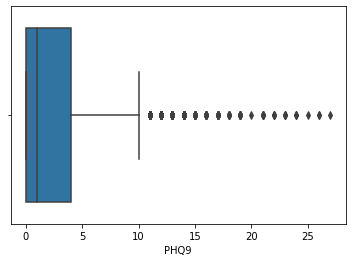

In [31]:
# Foi optado por não retirar os outliers, uma vez que fazem parte da análise do escore
sns.boxplot(SEQN_A1['PHQ9'])

## Depois desse pré-tratamento dos bancos de dados, serão criadas variáveis para facilitar a análise de cada grupo, procurando entender as correlações entre os hábitos saudáveis e os sintomas de depressão

In [32]:
# Optou-se também por trocar o nome das colunas RIAGENDR, RIDAGEYR, INDFMINC
SEQN_A1.rename(columns={'RIAGENDR': 'GÊNERO', 'RIDAGEYR': 'IDADE', 'INDFMINC': 'RENDA', 'DMDEDUC': 'ESCOLARIDADE',
                        'RIDRETH1': 'RAÇA/ETNIA'}, 
               inplace = True)
SEQN_A1

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,GÊNERO,IDADE,RAÇA/ETNIA,ESCOLARIDADE,RENDA,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0


In [33]:
# Outra alteração feita foi a separação da coluna idade em faixas etárias para ajudar na criação de gráficos e afins
limites_etarios = [0, 3, 12, 18, 35, 60, 1000]
SEQN_A1['faixas_etarias'] = pd.cut(SEQN_A1['IDADE'], limites_etarios, labels=['Bebês','Crianças','Adolescentes',
                                     'Adultos','Meia_Idade','Idosos'])

In [34]:
# Criando as variáveis, segundo os sintomas
sem_sintomas = SEQN_A1[SEQN_A1.PHQ_GRP == 0]
sintomas_leves = SEQN_A1[SEQN_A1.PHQ_GRP == 1]
sintomas_moderados = SEQN_A1[SEQN_A1.PHQ_GRP == 2]
sintomas_m_severos = SEQN_A1[SEQN_A1.PHQ_GRP == 3]
sintomas_severos = SEQN_A1[SEQN_A1.PHQ_GRP == 4]

In [35]:
# Exportando o dataset
SEQN_A1.to_csv('SEQN_A1.CSV', index=False)

# Analisando o grupo sem sintomas 

In [36]:
# Análise descritiva do grupo sem sintoma para idade
# Percebe-se que esse grupo é formado por indivíduos adultos (idade entre 18 e 35)
sem_sintomas['faixas_etarias'].describe().T

count        3654
unique          4
top       Adultos
freq         1239
Name: faixas_etarias, dtype: object

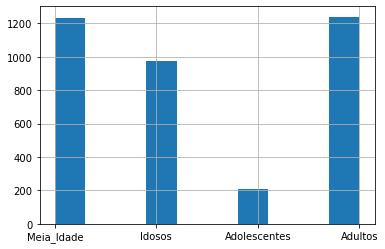

In [37]:
# Histograma das idades para o grupo sem sintoma
sem_sintomas.faixas_etarias.hist()
plt.show()

In [38]:
# Análise descritiva do grupo sem sintoma para renda
# A média de renda desse grupo é de $35000-44999 anuais
sem_sintomas['RENDA'].describe().T

count    3654.000000
mean        7.170224
std         3.096324
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        13.000000
Name: RENDA, dtype: float64

In [39]:
# A renda mais frequente para o grupo sem sintoma foi superior a $75 mil doláres anuais
sem_sintomas['RENDA'].sort_values().value_counts()

11.0    832
6.0     492
7.0     385
8.0     355
5.0     280
3.0     264
4.0     258
9.0     224
10.0    200
2.0     172
1.0     122
12.0     55
13.0     15
Name: RENDA, dtype: int64

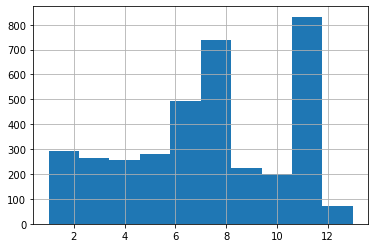

In [40]:
# Histograma para a renda desse grupo
sem_sintomas.RENDA.hist()
plt.show()

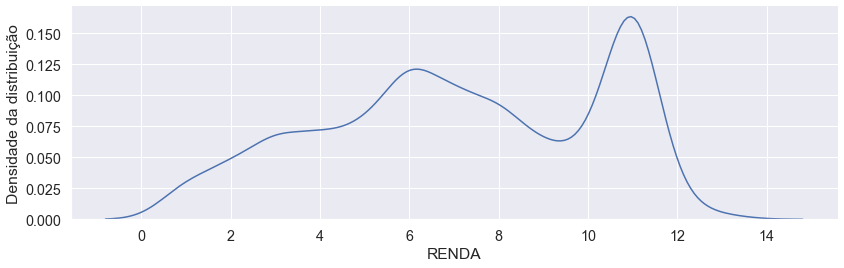

In [41]:
# Observar a densidade da distribuição em relação à renda
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = 'RENDA' # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
sns.displot(
    sem_sintomas[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
    height=4, # Altura em polegadas do gráfico
    aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
    kind='kde' # Distribuição contínua,
) 
plt.ylabel('Densidade da distribuição')
plt.show()

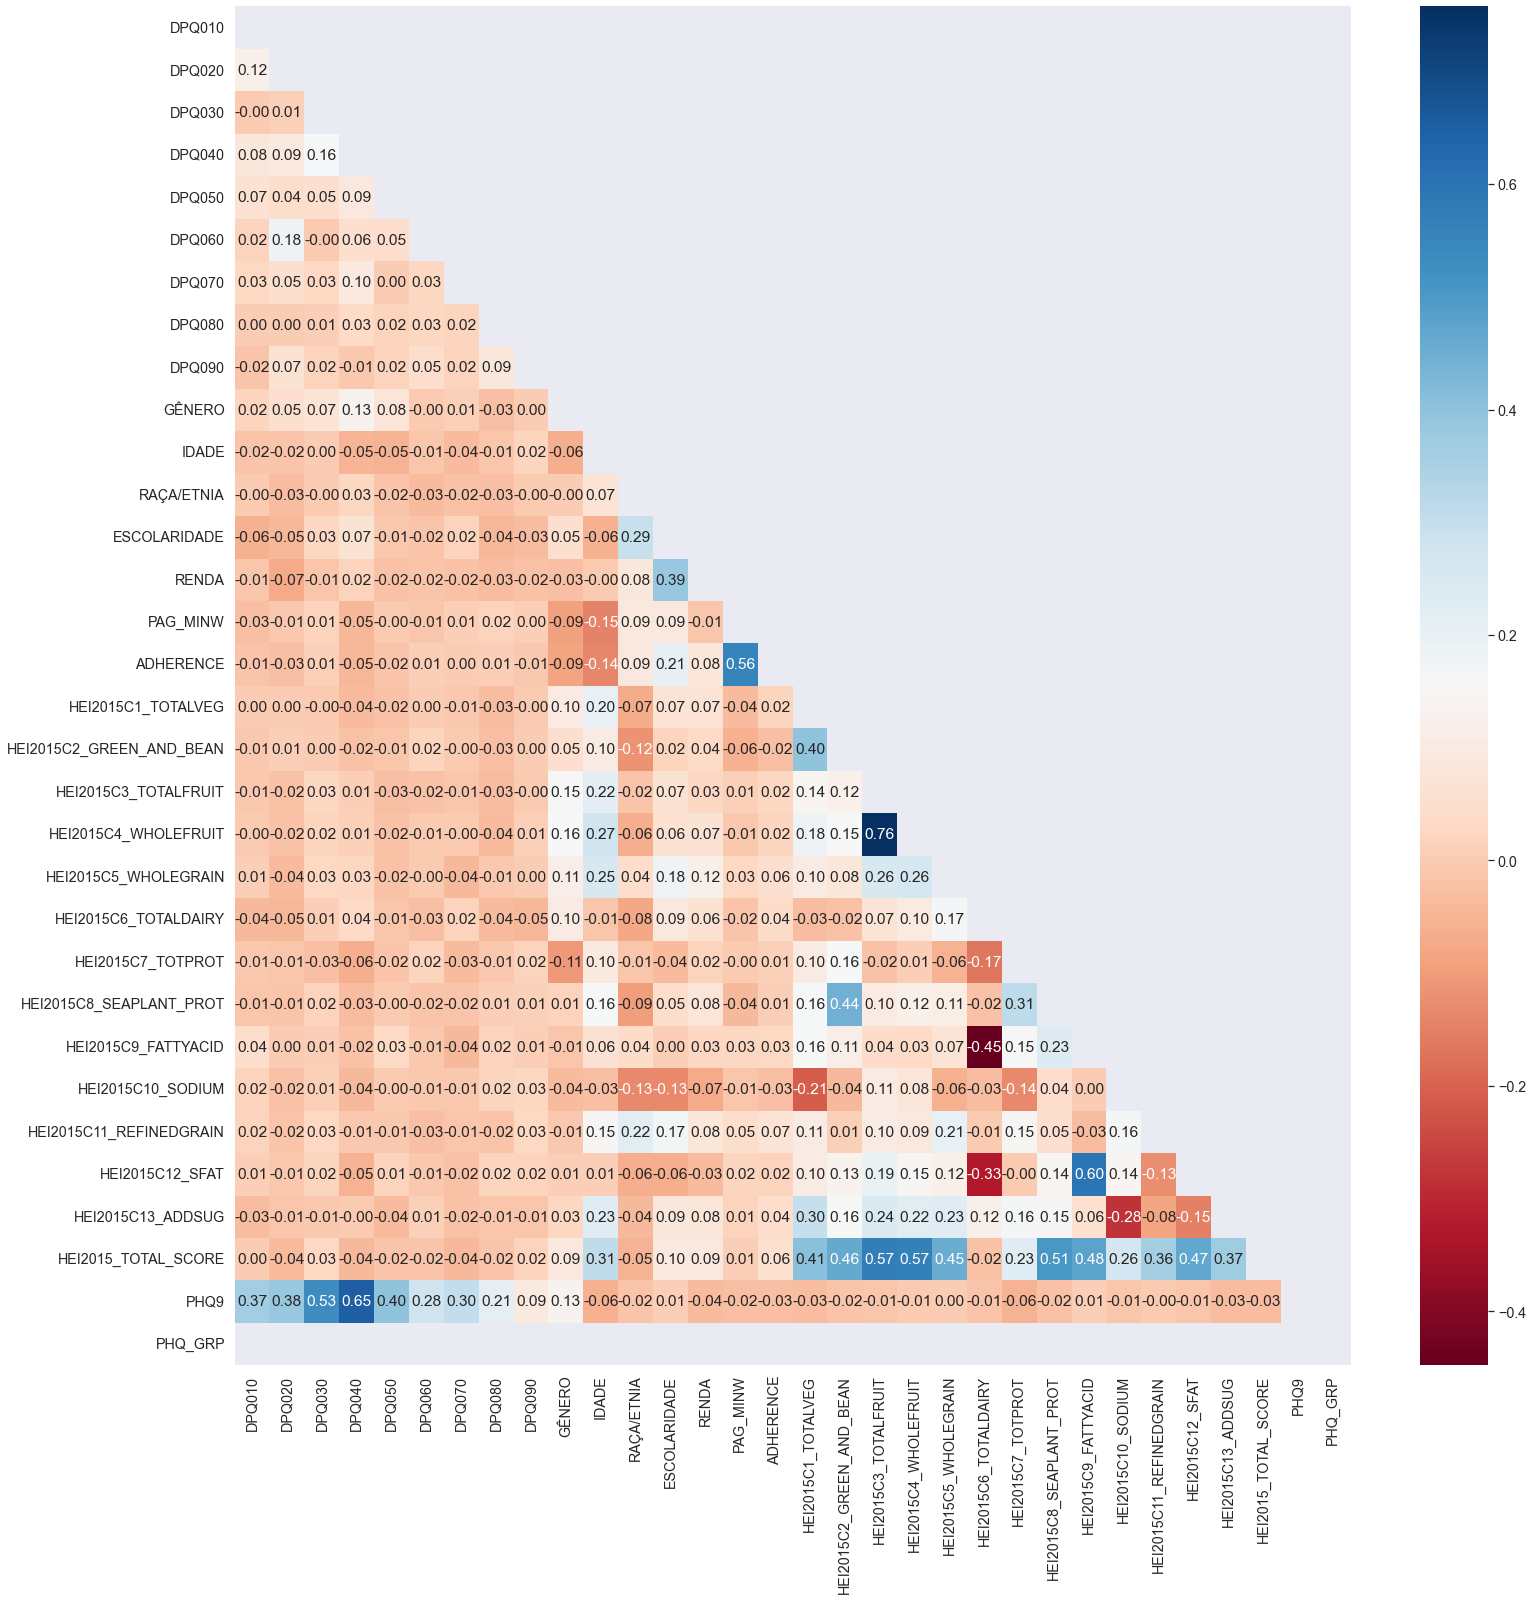

In [42]:
# Agora será analisada a correlação das variáveis.
# Não parece haver correlação entre alimentação e o escore(PHQ9)
sns.set_context(font_scale = 2.9)
plt.figure(figsize = (25,25))
sns.heatmap(
    sem_sintomas.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(sem_sintomas.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

## Análise do aspecto dietético do grupo sem sintoma:
### Foi considerado como hábitos de aliementação saudável boa ingestão de frutas, verduras, legumes, proteína e grãos. Além disso, deve-se apresentar baixa ingestão de açúcar e gorduras e grãos refinados 

In [43]:
# Analisando a alimentação do grupo sem sintomas, é possível perceber que a média pra esse grupo é de 50
sem_sintomas['HEI2015_TOTAL_SCORE'].describe().T

count    3654.000000
mean       50.220396
std        12.458606
min        16.059212
25%        41.163434
50%        49.813066
75%        58.477997
max        89.529383
Name: HEI2015_TOTAL_SCORE, dtype: float64

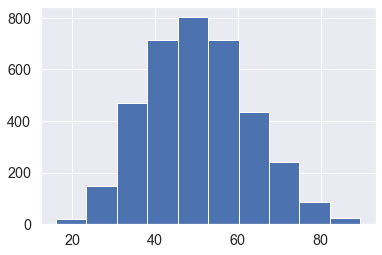

In [44]:
# Histograma do escore de alimentação
sem_sintomas.HEI2015_TOTAL_SCORE.hist()
plt.show()

In [45]:
# Agora será avaliado a composição da dieta do grupo sem sintoma, começando com o total vegetais 
sem_sintomas['HEI2015C1_TOTALVEG'].describe().T

count    3654.000000
mean        3.237768
std         1.445943
min         0.000000
25%         2.101108
50%         3.248963
75%         4.880981
max         5.000000
Name: HEI2015C1_TOTALVEG, dtype: float64

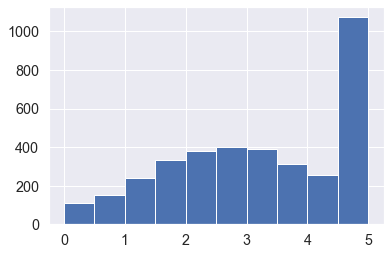

In [46]:
# O histograma permite concluir que há uma alta frequência para a maior pontuação de ingestão de vegetais
sem_sintomas.HEI2015C1_TOTALVEG.hist()
plt.show()

In [47]:
# Total de frutas consumidas por esse grupo
sem_sintomas['HEI2015C3_TOTALFRUIT'].describe().T

count    3654.000000
mean        2.530416
std         1.949580
min         0.000000
25%         0.480056
50%         2.395369
75%         5.000000
max         5.000000
Name: HEI2015C3_TOTALFRUIT, dtype: float64

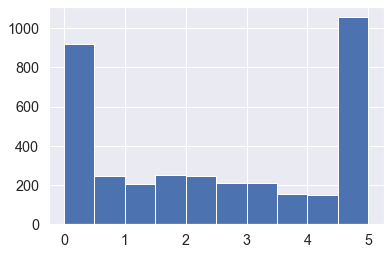

In [48]:
# O histograma aponta para alta frequência de não ingestão (0) e de alta ingestão (5)
sem_sintomas.HEI2015C3_TOTALFRUIT.hist()
plt.show()

In [49]:
# Avaliando a ingestão de grãos integrais
sem_sintomas['HEI2015C5_WHOLEGRAIN'].describe().T

count    3654.000000
mean        1.808274
std         1.930916
min         0.000000
25%         0.000000
50%         1.069209
75%         3.544674
max         5.000000
Name: HEI2015C5_WHOLEGRAIN, dtype: float64

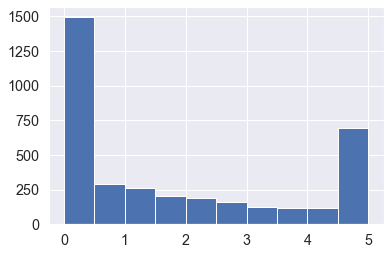

In [50]:
# Esse histograma indica baixa ingestão de grãos integrais por parte do grupo sem sintoma
sem_sintomas.HEI2015C5_WHOLEGRAIN.hist()
plt.show()

In [51]:
# Avaliando descritivamente a ingestão de protéinas vegetais e marinhas pelo grupo sem sintoma
sem_sintomas['HEI2015C8_SEAPLANT_PROT'].describe().T

count    3654.000000
mean        2.610936
std         2.174426
min         0.000000
25%         0.025525
50%         2.618073
75%         5.000000
max         5.000000
Name: HEI2015C8_SEAPLANT_PROT, dtype: float64

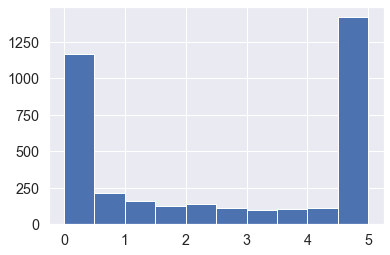

In [52]:
# Histograma dessa ingestão.
sem_sintomas.HEI2015C8_SEAPLANT_PROT.hist()
plt.show()

In [53]:
# Avalivando a ingestão de laticínios
sem_sintomas['HEI2015C6_TOTALDAIRY'].describe().T

count    3654.000000
mean        3.778411
std         1.588631
min         0.000000
25%         2.647440
50%         4.983031
75%         5.000000
max         5.000000
Name: HEI2015C6_TOTALDAIRY, dtype: float64

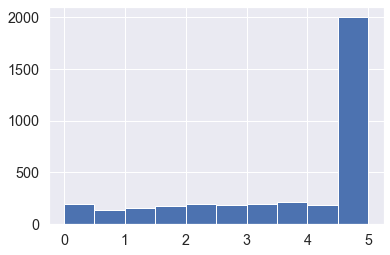

In [54]:
# Histograma aponta para alta ingestão de laticínios pelo grupo
sem_sintomas.HEI2015C6_TOTALDAIRY.hist()
plt.show()

In [55]:
# Avaliando a ingestão de sódio
sem_sintomas['HEI2015C10_SODIUM'].describe().T

count    3654.000000
mean        4.677873
std         3.401645
min         0.000000
25%         1.449400
50%         4.738094
75%         7.526487
max        10.000000
Name: HEI2015C10_SODIUM, dtype: float64

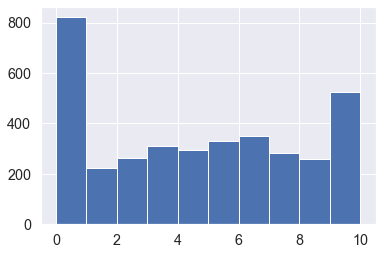

In [56]:
# Histograma para ingestão de sódio
sem_sintomas.HEI2015C10_SODIUM.hist()
plt.show()

In [57]:
# Avaliando a ingestão de grãos refinados
sem_sintomas['HEI2015C11_REFINEDGRAIN'].describe().T

count    3654.000000
mean        5.828898
std         3.461635
min         0.000000
25%         3.006227
50%         6.229537
75%         9.242017
max        10.000000
Name: HEI2015C11_REFINEDGRAIN, dtype: float64

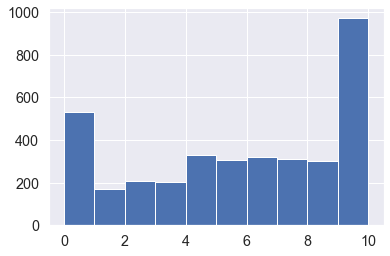

In [58]:
# Histograma para a ingestão de grãos refinados 
sem_sintomas.HEI2015C11_REFINEDGRAIN.hist()
plt.show()

In [59]:
# Avaliando a ingestão de gorduras saturadas 
sem_sintomas['HEI2015C12_SFAT'].describe().T

count    3654.000000
mean        6.034361
std         3.187298
min         0.000000
25%         3.652025
50%         6.332436
75%         8.969445
max        10.000000
Name: HEI2015C12_SFAT, dtype: float64

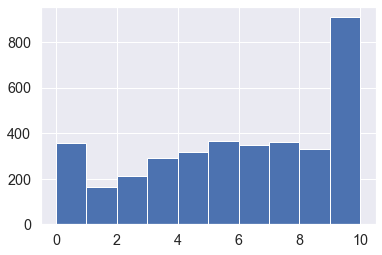

In [60]:
# Histograma para a ingestão de gorduras saturadas
sem_sintomas.HEI2015C12_SFAT.hist()
plt.show()

In [61]:
# Avaliando a ingestão de açúcar
sem_sintomas['HEI2015C13_ADDSUG'].describe().T

count    3654.000000
mean        6.308175
std         3.288894
min         0.000000
25%         3.879507
50%         6.948162
75%         9.546069
max        10.000000
Name: HEI2015C13_ADDSUG, dtype: float64

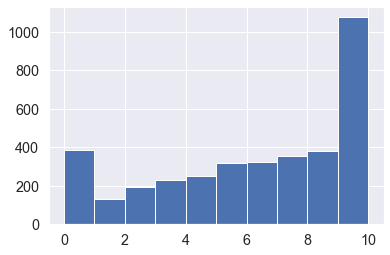

In [62]:
# Histograma para ingestão de açúcar
sem_sintomas.HEI2015C13_ADDSUG.hist()
plt.show()

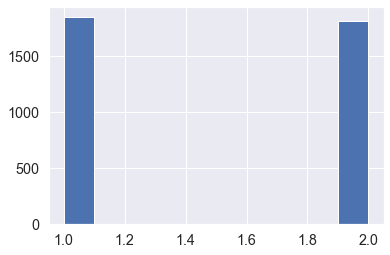

In [63]:
# Em última análise, o gênero com maior frequência nesse grupo é o masculino
sem_sintomas.GÊNERO.hist()
plt.show()

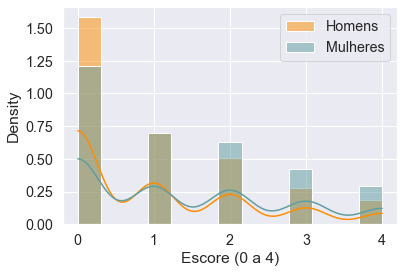

In [64]:
# Avaliando o perfil quanto ao gênero dos indivíduos que não apresentaram sintomas 
sns.histplot(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['PHQ9'], 
             label = 'Homens', stat = "density", color="darkorange", kde=True)
sns.histplot(sem_sintomas[sem_sintomas['GÊNERO'] == 2]['PHQ9'], 
             label = 'Mulheres', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Escore (0 a 4)')
plt.legend()
plt.show()

### É possível concluir que o grupo sem sintoma é composto, em sua maioria, por homens com um escore HEI elevado, de idade entre 18 e 35 anos e com renda anual de 35000-44999 dólares anuais

# Avaliando correlação entre o escore de depressão(PHQ9) e a prática de exercícios físicos(PAG_MINW), bem como o escore dietético(HEI2015_TOTAL_SCORE)

In [65]:
# Separação das colunas referentes a exercício físico e dieta
SEQN_A2 = pd.read_csv('SEQN_A1.CSV', usecols=['PAG_MINW','ADHERENCE', 'PHQ9', 'HEI2015_TOTAL_SCORE', 'PHQ_GRP'])

In [66]:
# Separação das colunas que dizem respeito aos hábitos alimentares
SEQN_A3 = pd.read_csv('SEQN_A1.CSV', usecols=['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
                                              'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
                                              'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 
                                              'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 
                                              'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'PHQ9', 'PHQ_GRP'])

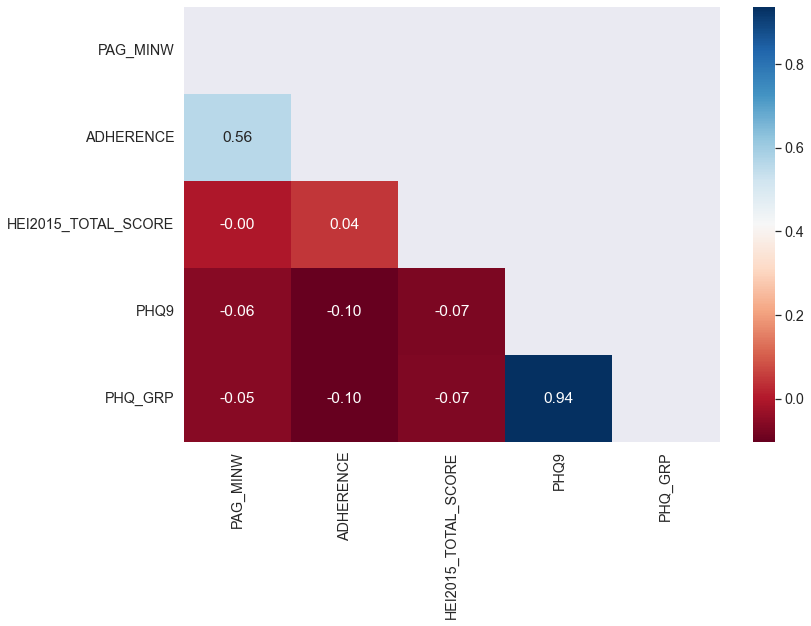

In [67]:
# Pode-se constatar que não existe uma correlação positiva entre as variáveis referentes a exercicio, escore de depressão e
# escore de alimentação saudável.
sns.set_context(font_scale = 1.9)
plt.figure(figsize = (12,8))
sns.heatmap(
    SEQN_A2.corr(), 
    annot = True, 
    fmt = ".2f",
    cmap = "RdBu", 
    mask = np.triu(np.ones_like(SEQN_A2.corr())) 
)

plt.show()

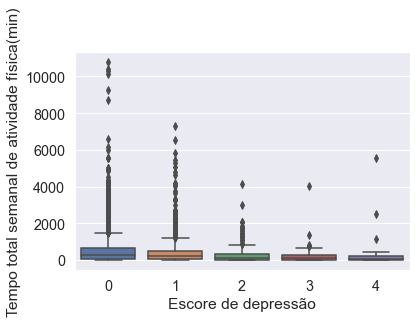

In [68]:
# Avaliando através do boxplot, percebe-se que há uma pequena diferença na prática de atividade física entre os grupos 
sns.boxplot(y = 'PAG_MINW', x = 'PHQ_GRP', data = SEQN_A2)
plt.xlabel('Escore de depressão')
plt.ylabel('Tempo total semanal de atividade física(min)')
plt.show()

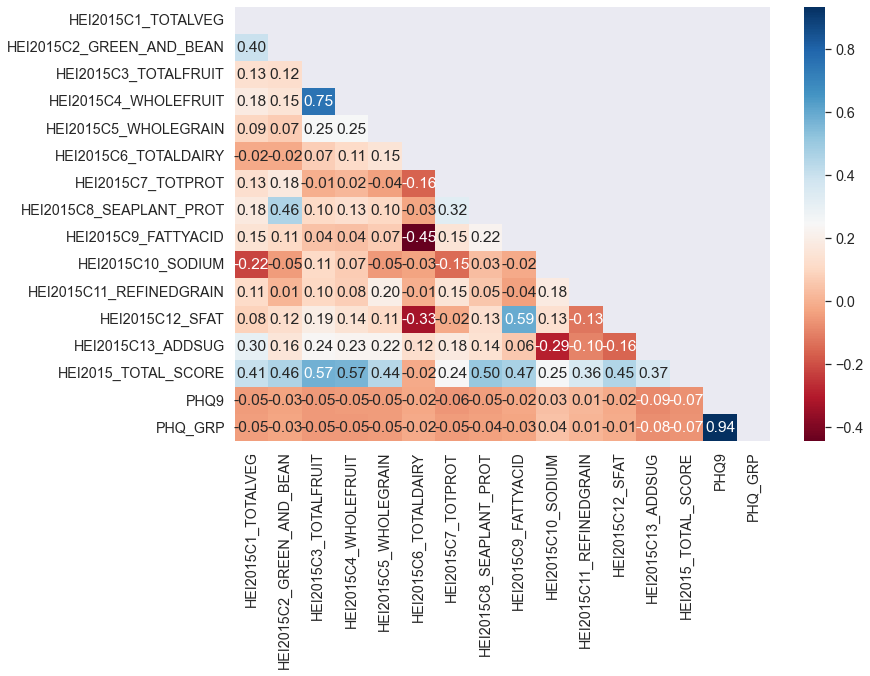

In [69]:
# Analisando correlações entre dieta e depressão, é possível constatar a ausência de correlação positiva entre as variáveis
sns.set_context(font_scale = 1.9)
plt.figure(figsize = (12,8))
sns.heatmap(
    SEQN_A3.corr(), 
    annot = True, 
    fmt = ".2f",
    cmap = "RdBu", 
    mask = np.triu(np.ones_like(SEQN_A3.corr())) 
)

plt.show()

# Regressão linear para testar hipótese de efeito entre prática de atividade física e o escore de depressão
## Hipótese nula: Não tem efeito entre praticar exercícios e os sintomas de depressão
## hipótese alternativa: Tem efeito entre praticar exercícios e os sintomas de depressão

In [70]:
# Importando as bibliotecas para aplicar a regressão
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [71]:
mod1 = smf.ols(formula = 'PHQ9 ~ PAG_MINW', data = sem_sintomas)

In [72]:
res = mod1.fit()

In [73]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   PHQ9   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.127
Date:                Tue, 25 Jan 2022   Prob (F-statistic):              0.145
Time:                        17:50:23   Log-Likelihood:                -6114.0
No. Observations:                3654   AIC:                         1.223e+04
Df Residuals:                    3652   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2008      0.025     47.582      0.0

## Usando a regressão linear, pode-se verificar que a hipótese alternativa (existe efeito entre praticar exercício e o escore de depressão) foi estabelecida, pois o valor de P < 0,05.

# Regressão linear para testar hipótese de efeito entre alimentação e o escore de depressão
## Hipótese nula : Não tem efeito entre alimentar-se bem e os sintomas de depressão
## Hipótese alternativa: Existe efeito entre bons hábitos de alimentação e depressão

In [74]:
mod2 = smf.ols(formula = 'PHQ9 ~ HEI2015_TOTAL_SCORE', data = SEQN_A1)

In [75]:
res = mod2.fit()

In [76]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   PHQ9   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.26
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           5.19e-07
Time:                        17:50:24   Log-Likelihood:                -12537.
No. Observations:                4592   AIC:                         2.508e+04
Df Residuals:                    4590   BIC:                         2.509e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8238    

### É possível concluir que há efeito entre a alimentação e os sintomas de depressão, posto que "P" assumiu valor menor que 0,05

# Por fim, será analisado o perfil dos que apresentaram sintomas mais severos

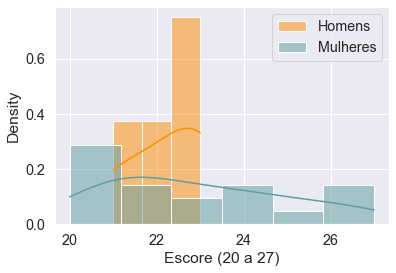

In [77]:
# Gráfico de densidade
sns.histplot(sintomas_severos[sintomas_severos['GÊNERO'] == 1]['PHQ9'], 
             label = 'Homens', stat = "density", color="darkorange", kde=True)
sns.histplot(sintomas_severos[sintomas_severos['GÊNERO'] == 2]['PHQ9'], 
             label = 'Mulheres', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Escore (20 a 27)')
plt.legend()
plt.show()

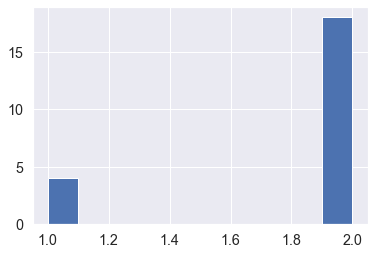

In [78]:
# Histograma de gênero indica que as mulheres são as mais afetadas
sintomas_severos.GÊNERO.hist()
plt.show()

In [79]:
# A análise descritiva mostra que os indivíduos de meia idade (35 a 60 anos) são os mais afetados
sintomas_severos['faixas_etarias'].describe().T

count             22
unique             4
top       Meia_Idade
freq              15
Name: faixas_etarias, dtype: object

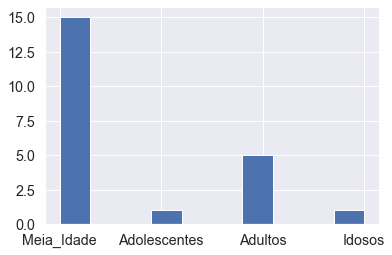

In [80]:
# Histograma das faixas etárias
sintomas_severos.faixas_etarias.hist()
plt.show()

In [81]:
# Analisando as frequências de renda ordenadadamente
sintomas_severos['RENDA'].sort_values().value_counts()

3.0     7
2.0     4
6.0     4
5.0     3
1.0     1
7.0     1
11.0    1
12.0    1
Name: RENDA, dtype: int64

In [82]:
# Média de ganho anual dos que mais sofrem com os sintomas
sintomas_severos['RENDA'].mean()

4.5

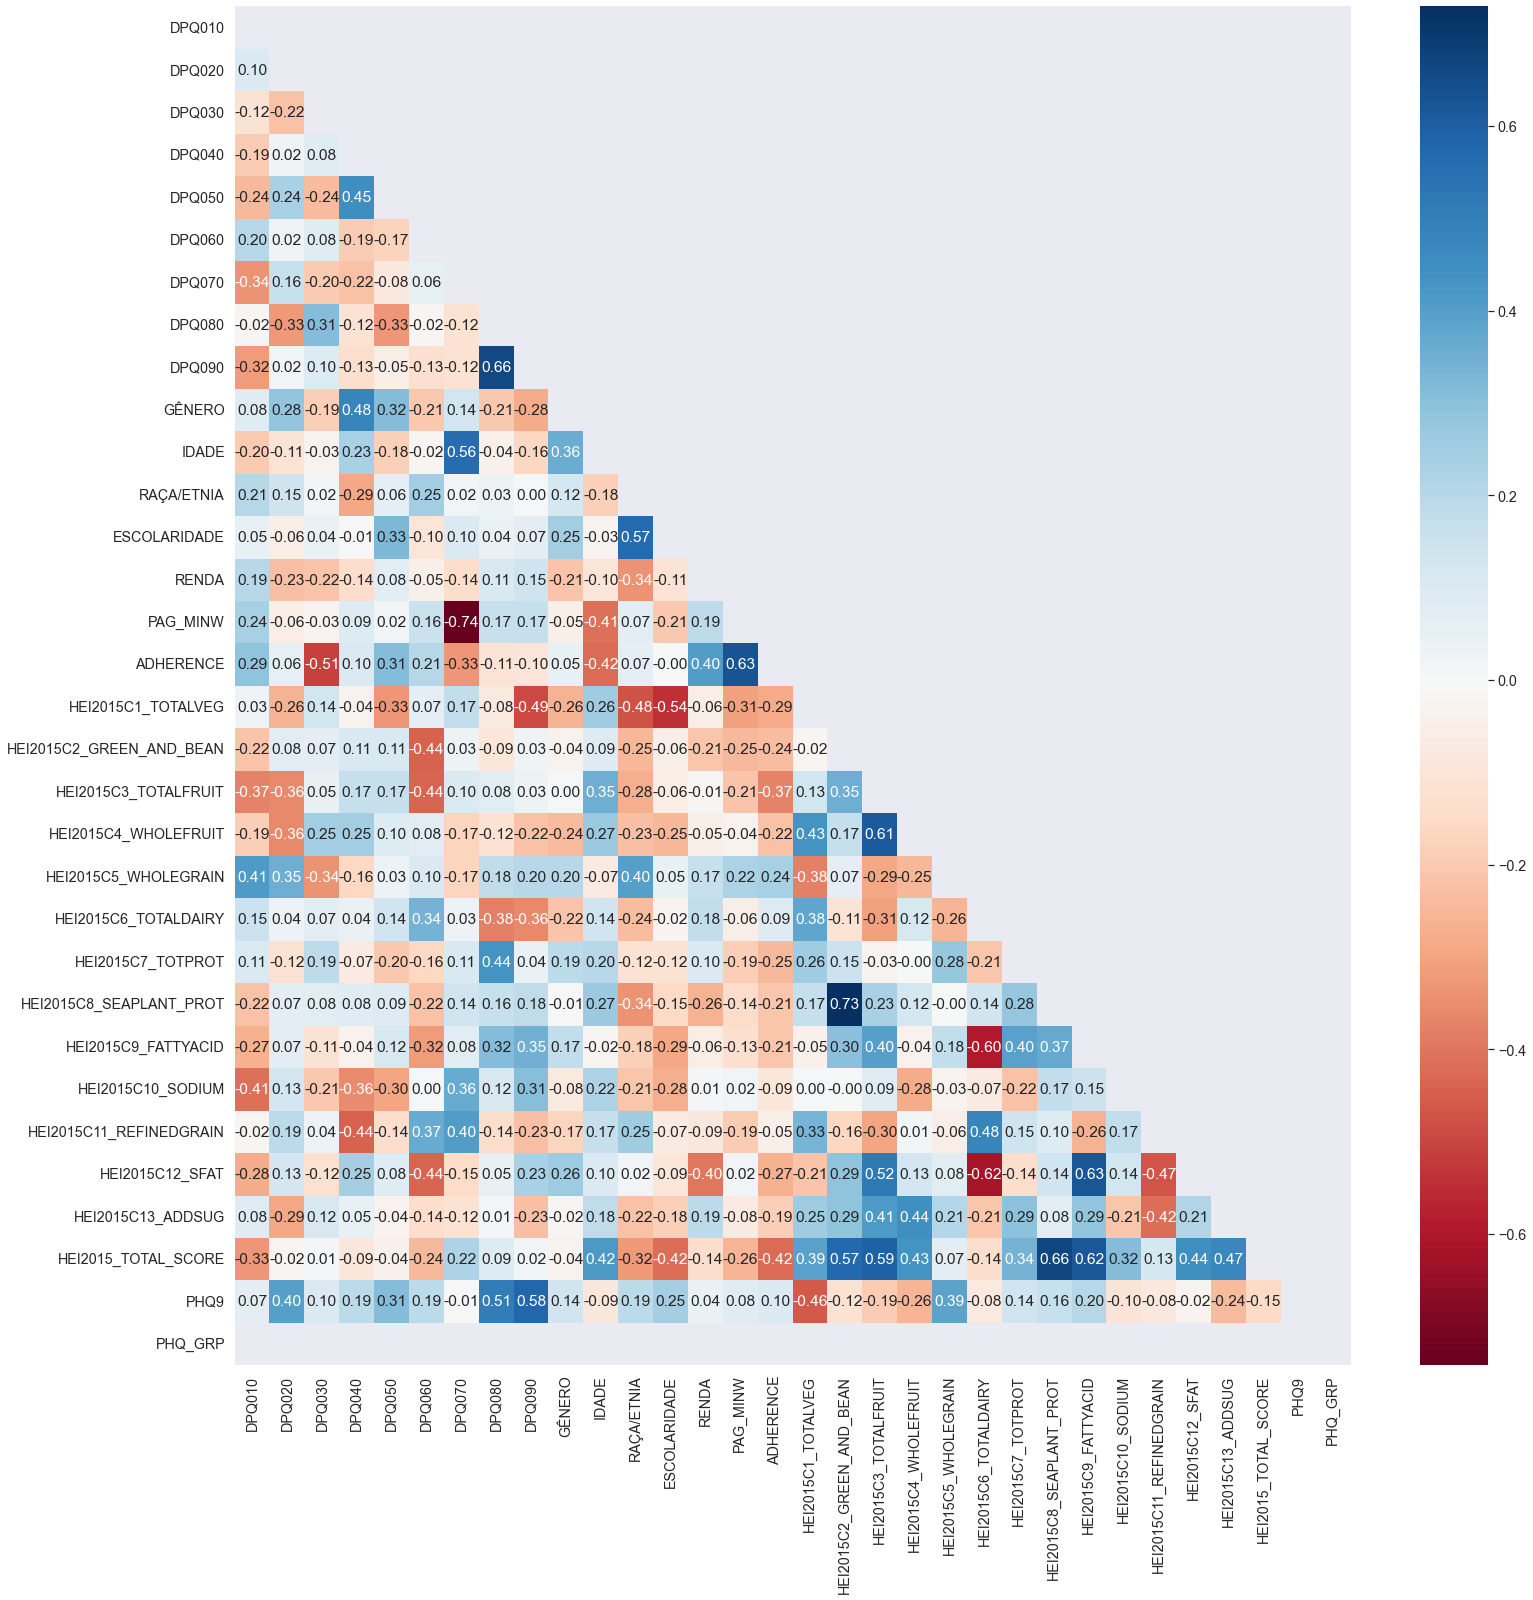

In [83]:
# Gráfico de correlação para sintomas severos
sns.set_context(font_scale = 3)
plt.figure(figsize = (25,25))
sns.heatmap(
    sintomas_severos.corr(), 
    annot = True, 
    fmt = ".2f",
    cmap = "RdBu", 
    mask = np.triu(np.ones_like(sintomas_severos.corr())) 
)

plt.show()

# Teste da significância estatística entre os grupos sem sintomas e sintomas severos

In [84]:
# Importando a função que realiza o teste-t para amostras independentes
from scipy.stats import ttest_ind

In [106]:
# Teste-t para homens sem sintomas e mulheres com sintomas severos, usando como referência o tempo total mensal de exercício
stat, p = ttest_ind(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['PAG_MINW'], 
                    sintomas_severos[sintomas_severos['GÊNERO'] == 2]['PAG_MINW'])

In [107]:
# Estabelecendo o 'p' valor como 0,05, pode-se inferir que existe 
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.564, p=0.573


In [108]:
# Teste-T para gênero diferentes, tendo como referência a aderência à prática de atividade física
stat, p = ttest_ind(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['ADHERENCE'], 
                    sintomas_severos[sintomas_severos['GÊNERO'] == 2]['ADHERENCE'])

In [109]:
# Resultado do teste-T para a aderência, apontando para diferença estatística significante.
print('stat=%.3f, p=%.3f' % (stat, p))

stat=2.419, p=0.016


In [88]:
import pingouin as pg

In [110]:
# Teste-t para homens sem sintomas e com sintomas severos, usando como referência o tempo total mensal de exercício
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['PAG_MINW'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 1]['PAG_MINW'], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.104059,1844,two-sided,0.917134,"[-924.4, 831.25]",0.052086,0.429,0.05124


In [112]:
# Teste-t para homens sem sintomas e mulheres com sintomas severos, usando como referência o tempo total mensal de exercício
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['PAG_MINW'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 2]['PAG_MINW'], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.563792,1858,two-sided,0.572964,"[-297.23, 537.05]",0.133535,0.279,0.087098


In [113]:
# Teste-T para gêneros iguais sem sintomas e com sintomas severos, usando como referência a aderência à 
# prática de atividadefísica
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['ADHERENCE'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 1]['ADHERENCE'], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.387822,1844,two-sided,0.165359,"[-0.26, 1.52]",0.694664,0.808,0.283776


In [116]:
# Teste-T para gênero diferentes, tendo como referência a aderência à prática de atividade física
# P < 0,05 indica diferença estatística significativa entre as amostras
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['ADHERENCE'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 2]['ADHERENCE'], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.419034,1858,two-sided,0.015657,"[0.1, 0.94]",0.572951,3.072,0.676465


In [114]:
# Teste-T para gêneros iguais, tendo como referência o escore de alimentação
# p < 0,05 indica diferença estatística significativa
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['HEI2015_TOTAL_SCORE'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 1]['HEI2015_TOTAL_SCORE'], 
         correction=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.733083,1844,two-sided,0.463601,"[-7.45, 16.35]",0.366939,0.509,0.113406


In [115]:
# Teste-T para gêneros diferentes, tendo como referência o escore de alimentação
# p > 0,05 indica que não há diferença estatística significantes entre as amostras 
pg.ttest(sem_sintomas[sem_sintomas['GÊNERO'] == 1]['HEI2015_TOTAL_SCORE'], 
         sintomas_severos[sintomas_severos['GÊNERO'] == 2]['HEI2015_TOTAL_SCORE'], 
         correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.942362,1858,two-sided,0.052244,"[-0.05, 11.23]",0.460051,1.236,0.492626
